<a href="https://colab.research.google.com/github/NIKHIL-PAULOSE/PROJECT/blob/master/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   #                            **INTERNSHIP PROJECT**
   **SUBMITTED BY: NIKHIL PAULOSE**

 **DATA DESCRIPTION**:

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank(mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**AIM OF THE PROJECT**:

To predict the likelihood of a liability customer buying personal loans.
                       




**STEP 1-Importing the required datasets and libraries**

In [295]:
import numpy as np
import pandas as pd

In [296]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 sns.set(style="ticks")



**Uploading Datas**

In [297]:
 from google.colab import files
 uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (4).xlsx


In [298]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","Personal Loan","Securities Account","CD Account","Online","CreditCard"]

In [299]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [300]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [301]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

The attributes can be divided accordingly :


* There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:


* **Personal Loan** - Did this customer accept the personal loan offered in the last campaign? ** This is our target variable**
* **Securities Account**    - Does the customer have a securities account with the bank?
* **CD Account** - Does the customer have a certificate of deposit (CD) account with the bank?
* **Online**- Does the customer use internet banking facilities?
* **Credit Card** - Does the customer use a credit card issued by Universal Bank?


**Interval variables** are as below:

*  **Age** - Age of the customer
*  **Experience** - Years of experience
*  **Income** - Annual income of customer
*  **CCAvg**- Average spending in credit card per month
*  **Mortgage** - Value of House Mortgage

**Ordinal Categorical Variables** are:

* **Family** - Family size of the customer
* **Education** - Education level of the customer 
                 1. Undergraduate   
                 2. Graduate                
                 3. Advanced/Professional 
                           
The **nominal variable** is :
*   **ID**- Customer ID
*   **Zip Code** - Home address Zip code














**1.1: Displaying datatype of each column and non-null rows for each column**

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**1.2: Displaying data shape**

In [303]:
data.shape

(5000, 14)

**1.3: Displaying Summary Statics that includes count,mean,std,min,max**

In [304]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**1.4: Displaying null values present in each column**

In [305]:
data.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Inferences**:


*   The data provided consists of 5000 rows and 14 attributes
*   There are no null values present in the data.
*   The experience attribute as negative values in data.Experience cannot be    negative.Hence the data is to be cleaned.




Lets check the **correlation between age and experience**

In [306]:
data ['Experience'].corr (data['Age'])

0.9942148569683321

 **Since Age and Experience are highly correlated lets consider Age column for our further results.**




**STEP 2- Cleaning the data for any variable**
 
*  There are negative values in the Experience column. This could be a data input error as in general it is not possible to measure negative years of experience.Hence it is to be dropped.
*  Since ID variable does not provide any conclusions to our results,it is to be dropped.



In [307]:
data = data.drop (['ID','Experience'],axis=1)

In [308]:
# Describing the datas after cleaning the variables ID and Experience 
data.describe()

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [309]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


**STEP 3 - EXPLORATORY DATA ANALYSIS (EDA)**

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

**3.1: Number of unique in each column**

In [310]:
data.nunique()

Age                    45
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**3.2: Number of people with zero mortgage**

In [311]:
(data.Mortgage ==0).sum()

3462

**3.3: Number of people with zero credit card spending per month**

In [312]:
(data.CCAvg ==0).sum()

106

**3.4: Value counts of all categorical columns**

In [313]:
data['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [314]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [315]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [316]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [317]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [318]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [319]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**3.5 (a) Univariate Analysis**

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

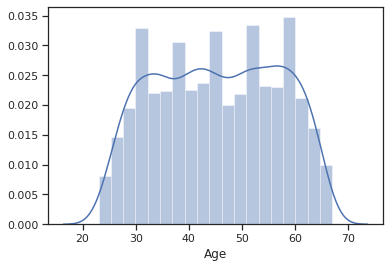

In [320]:
sns.distplot(data.Age);

**Observation**: Age has symmetric distribution

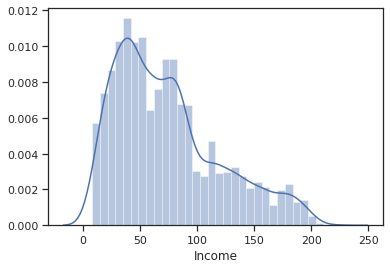

In [321]:
sns.distplot(data.Income);

**Observation**: Income is right skewed distribution

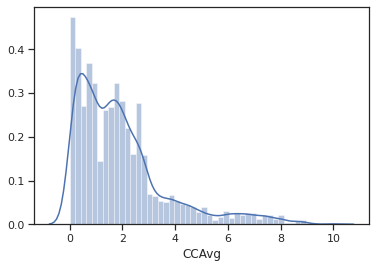

In [322]:
sns.distplot(data.CCAvg);

**Observation:** Credit card average is right skewed distribution 

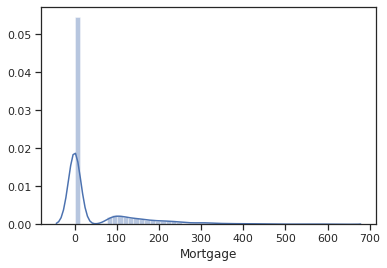

In [323]:
sns.distplot(data.Mortgage);

**Observation:** Mortgage is a highly skewed distribution

**Analysis by plotting bars**

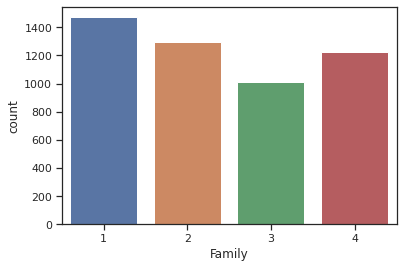

In [324]:
sns.countplot(data.Family);

**Inferences:**

* The first family undergoes a count of 1472 members.
* The second family undergoes a count of 1296 members.
*  The third family undergoes a count of 1010 members.
*  The fourth family undergoes a count of 1222 members.





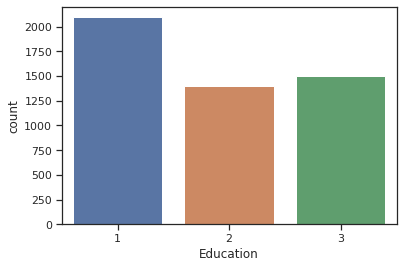

In [325]:
sns.countplot(data['Education'])

**Inferences**:

*   2096 members are undergraduate.
*   1403 members are graduate.
*   1501 members are advanced/professional.







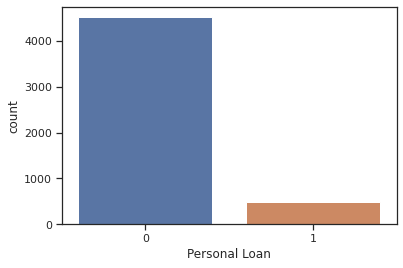

In [326]:
sns.countplot(data['Personal Loan'])

In [327]:
480/5000

0.096

**Inferences:**

*   Only 480 people from 5000 customers (9.6%) has taken the loan which is less.
*   Our aim is to increase the percentage of people taking personal loan.



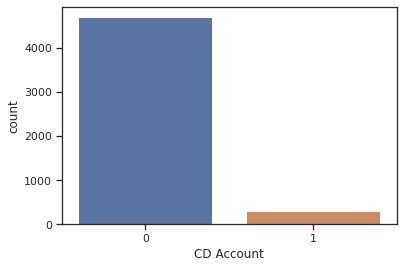

In [328]:
sns.countplot(data['CD Account'])

In [329]:
302/5000

0.0604

**Inferences:** 

*  302 customers out of 5000 customers (60.4%) are only having this CD Account.





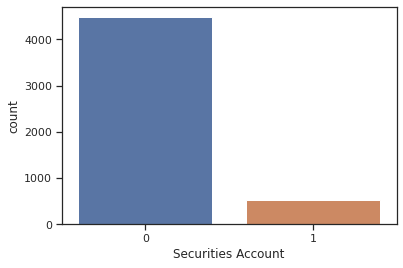

In [330]:
sns.countplot(data['Securities Account'])

In [331]:
522/5000

0.1044

**Inferences**:

*  522 customers out of 5000 people (10.4%) have Securities Account.



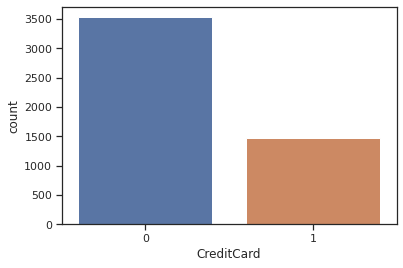

In [332]:
sns.countplot(data['CreditCard'])

In [333]:
1470/5000

0.294

**Inferences:** 

*  1470 out of 5000 customers (29.4%) are using credit card facilities.



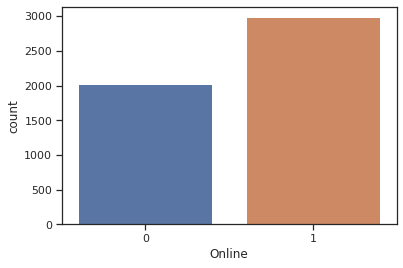

In [334]:
sns.countplot(data['Online'])

In [335]:
2984/5000

0.5968

**Inferences:**

* 2984 out of 5000 customers (59.68%) customers utilises online facilities provided. 



**3.5 (b) Bivariate Analysis**

**Bivariate analysis means the analysis of bivariate data.** It is one of the simplest forms of statistical analysis, used to find out if there is a relationship between two sets of values.

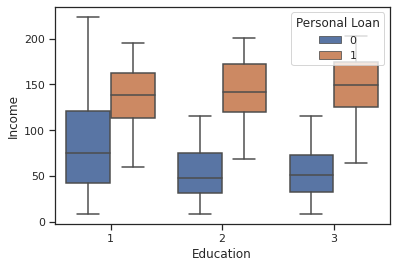

In [336]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

**Observation** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels.

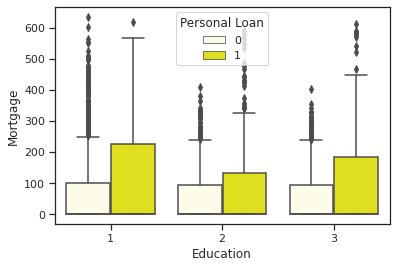

In [337]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='yellow')

**Observation** : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage.

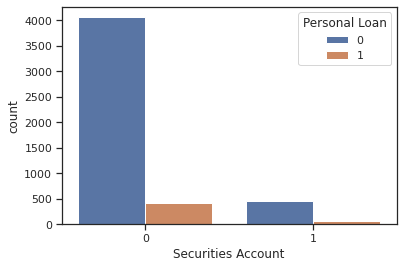

In [338]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

**Observation:** Majority of customers who does not have loan have securities account.

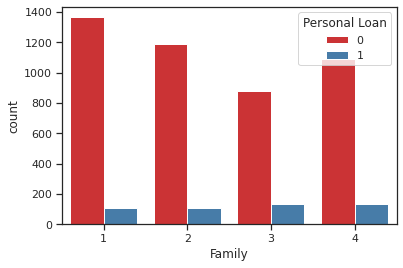

In [339]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')

**Observation:** Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

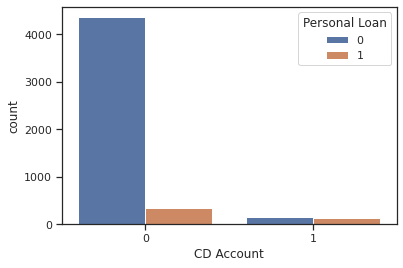

In [340]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

**Observation:** Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well.

Let us drop Zip code as it does not effectively influence personal loan.

In [341]:
data = data.drop('ZIPCode',axis=1)

In [342]:
#Checking the variables after dropping 
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


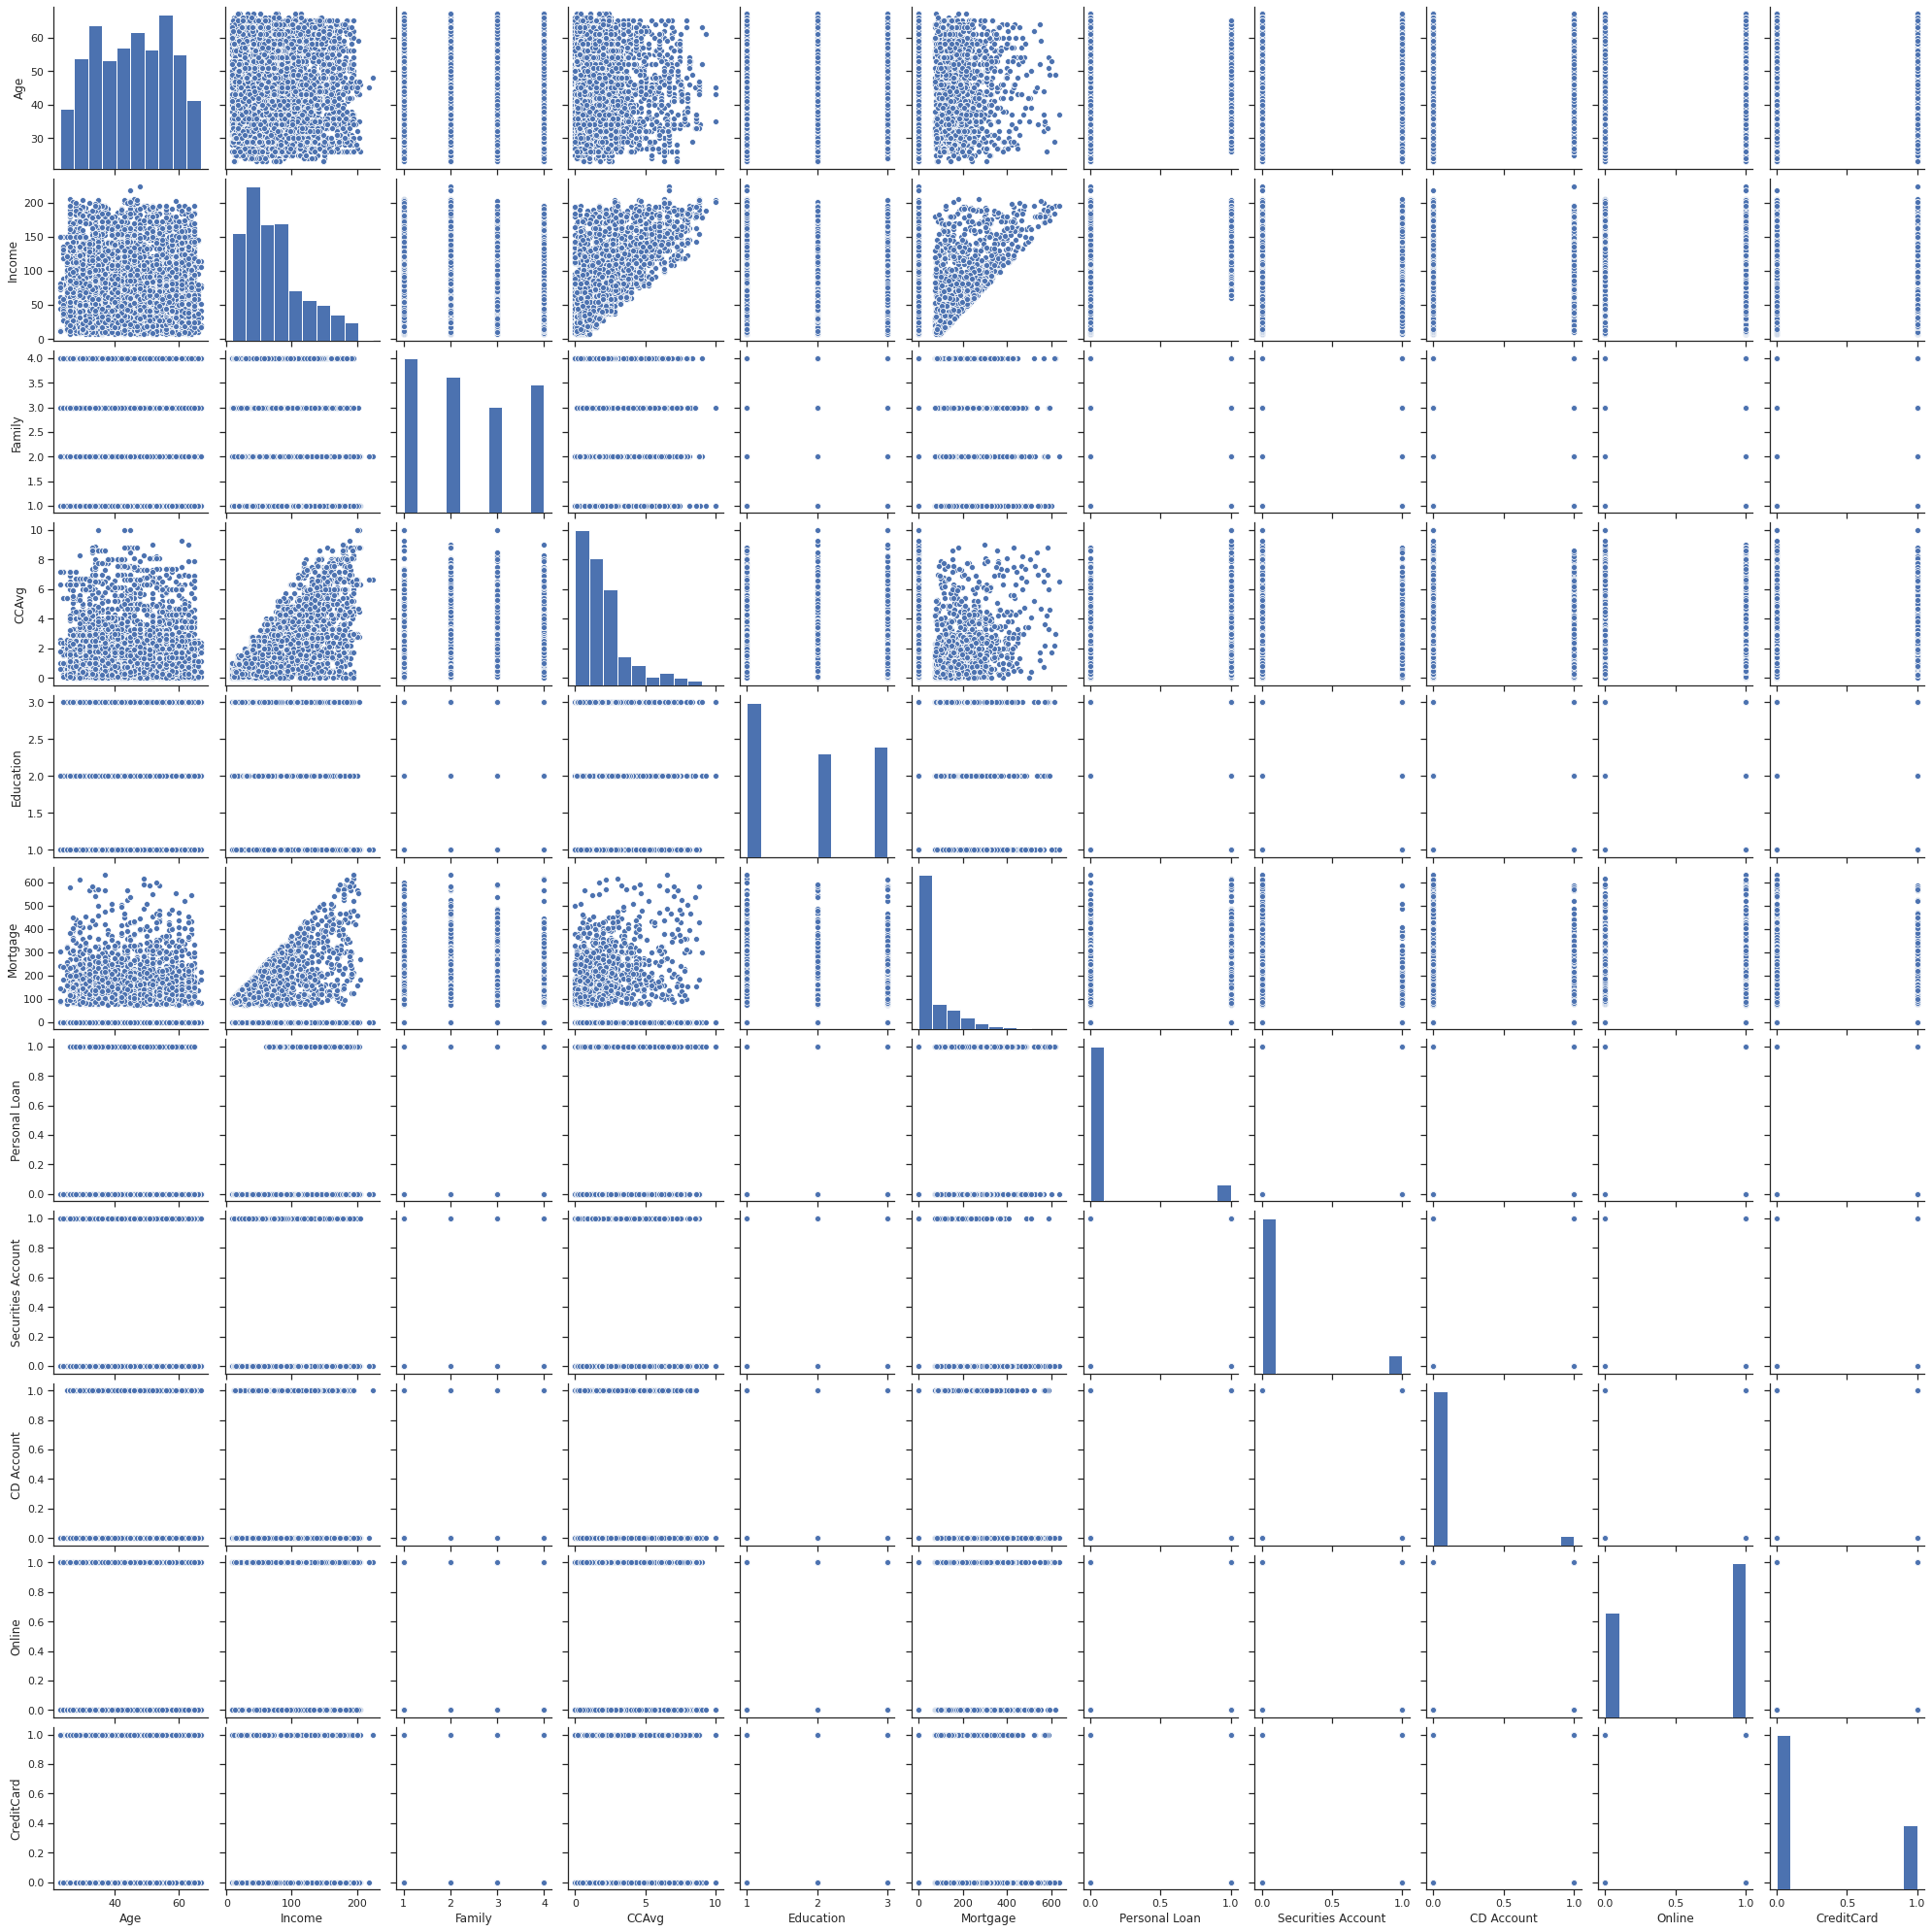

In [343]:
sns.pairplot(data)

**Correlation with heatmap**

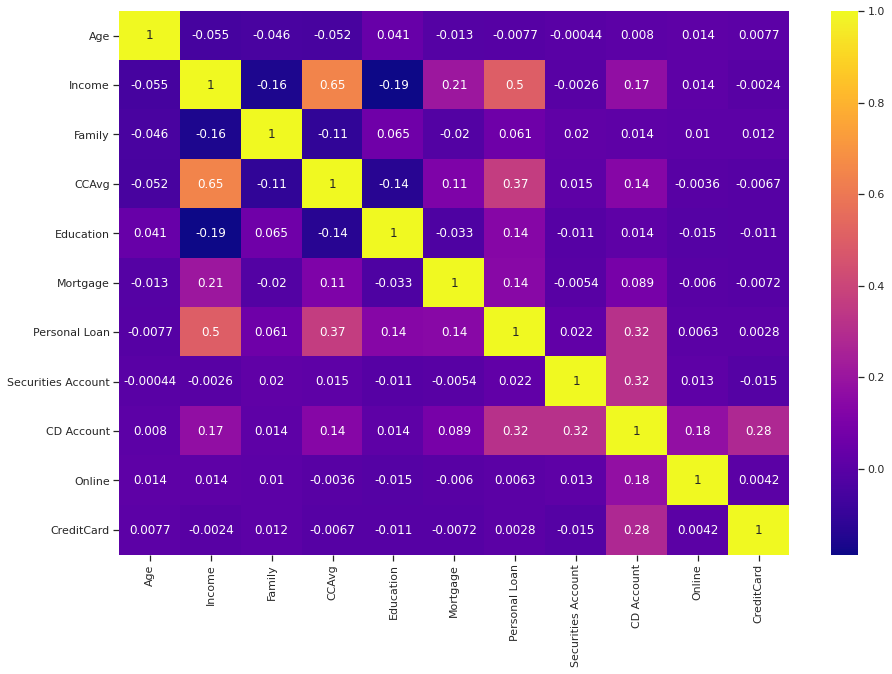

In [344]:
fig,ax = plt.subplots (figsize =(15,10))
sns.heatmap (data.corr(),cmap='plasma',annot=True);

Let x variable imply attributes excluding personal loan.
Let y variable imply personal loan attribute.

In [345]:
x = data[['Age','Income','Family','Education','CCAvg','Securities Account','CD Account','Mortgage','Online','CreditCard']]
y = data['Personal Loan'].values

**Step 4- Transformations of feature variables:**

Here I have used **yeo-johnson transformation**

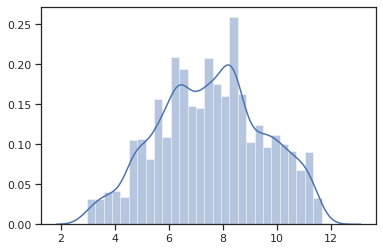

In [346]:
from sklearn.preprocessing import  PowerTransformer
pt = PowerTransformer(method="yeo-johnson" ,standardize=False)
pt.fit(x["Income"].values.reshape(-1,1))
temp=pt.transform(x["Income"].values.reshape(-1,1))
sns.distplot(temp);



**Modifying income variable**

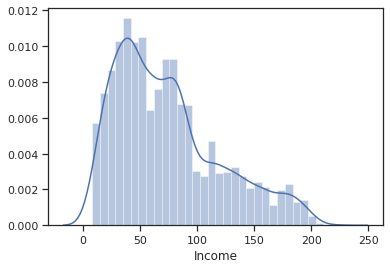

In [347]:
sns.distplot(x["Income"]);
plt.show()

Result: Income variable after applying yeo-johnson transformation

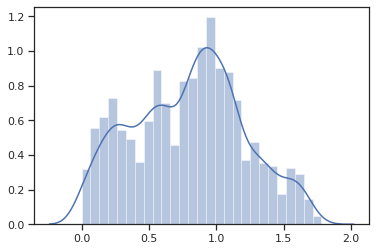

In [348]:
from sklearn.preprocessing import  PowerTransformer
pt = PowerTransformer(method="yeo-johnson" ,standardize=False)
pt.fit(x["CCAvg"].values.reshape(-1,1))
temp=pt.transform(x["CCAvg"].values.reshape(-1,1))
sns.distplot(temp);


**Modifying CCAvg Variable**

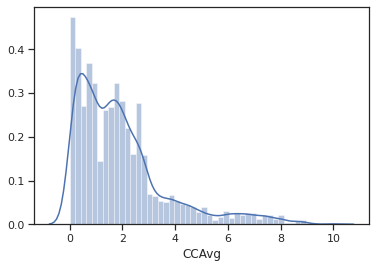

In [349]:
sns.distplot(x["CCAvg"]);
plt.show()

Result: CCAvg variable after applying yeo-johnson transformation

**Observations:**
* The income and CCAvg variables with right skewed distributions have now been transformed to normal distributions.
* Transformation cannot be applied in mortgage variable due to the discontinuity in data.Hence binning is applied.
* **Binning** is a data preprocessing method and can be applied to handle mortgage variable.



In [350]:
x['MortgageN'] = pd.cut(x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
x.drop('Mortgage',axis=1,inplace=True)

In [351]:
x.head()

,Age,Income,Family,Education,CCAvg,Securities Account,CD Account,Online,CreditCard,MortgageN
0,25,49,4,1,1.6,1,0,0,0,0
1,45,34,3,1,1.5,1,0,0,0,0
2,39,11,1,1,1.0,0,0,0,0,0
3,35,100,1,2,2.7,0,0,0,0,0
4,35,45,4,2,1.0,0,0,0,1,0


**Step 5-Splitting the data using Stratified Sampling**

In [352]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)

**Scaling Datas**

In [353]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
scx.fit_transform(x_train)
scx.transform(x_test)

array([[-0.97265109,  2.31851937, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -1.19253735,
         1.52960605,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  0.83854816,
        -0.65376311, -0.47490853]])

In [354]:
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate (x_train.columns):
  scaler=StandardScaler()

In [355]:
scaler.fit(x_train[[column]])

StandardScaler(copy=True, with_mean=True, with_std=True)

**STEP 6-LOGISTIC REGRESSION MODEL**

Logistic Regression is a supervised learning classification algorithm used to predict the probability of a target variable.

In [356]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [357]:
y_pred = model.predict(x_test)

**STEP 7- Printing all metrics Of Logistic Regression Model**

In [358]:
print("ACCURACY SCORE FOR TEST DATA FOR LOGISTIC REGRESSION IS:",metrics.accuracy_score(y_test,y_pred))
print("ACCURACY SCORE FOR TRAIN DATA FOR LOGISTIC REGRESSION IS:",metrics.accuracy_score(y_train,model.predict(x_train)))


ACCURACY SCORE FOR TEST DATA FOR LOGISTIC REGRESSION IS: 0.944
ACCURACY SCORE FOR TRAIN DATA FOR LOGISTIC REGRESSION IS: 0.9497142857142857


In [359]:
print("RECALL SCORE FOR LOGISTIC REGRESSION IS:",metrics.recall_score(y_test,y_pred))
print("PRECISION FOR LOGISTIC REGRESSION IS:",metrics.precision_score(y_test,y_pred))
print("F1 SCORE FOR LOGISTIC REGRESSION IS:",metrics.f1_score(y_test,y_pred))
print("ROC AUC SCORE FOR LOGISTIC REGRESSION IS:",metrics.roc_auc_score(y_test,y_pred))
print("MEAN ABSOLUTE ERROR FOR LOGISTIC REGRESSION IS:",metrics.mean_absolute_error(y_test,y_pred))

RECALL SCORE FOR LOGISTIC REGRESSION IS: 0.5972222222222222
PRECISION FOR LOGISTIC REGRESSION IS: 0.7678571428571429
F1 SCORE FOR LOGISTIC REGRESSION IS: 0.671875
ROC AUC SCORE FOR LOGISTIC REGRESSION IS: 0.7890240904621436
MEAN ABSOLUTE ERROR FOR LOGISTIC REGRESSION IS: 0.056


**Confusion Matrix**

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [360]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1330   26]
 [  58   86]]


**Findings From Confusion Matrix**



* **True Positives (TP)**: These are cases in which we predicted yes, and customers actually took loan.**(TP=86)** 

* **True Negatives (TN):** We predicted no, and customers did not take loan   **(TN=1330)**
*  **False Positives (FP)**: We predicted yes, but customers didn't actually take the loan.(Also known as a "**Type I error**.") **(FP=26)**
* **False Negatives (FN)**: We predicted no, but they actually took the loan.(Also known as a "**Type II error**.") (**FN=58**)



**Classification Report**

In [361]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.77      0.60      0.67       144

    accuracy                           0.94      1500
   macro avg       0.86      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500



**Inferences Regarding Logistic Regression Model**



*   Logistic Regression Model is having an accuracy of 94%
*   From confusion matrix it can noted that the false positive is 26 which is not impressive.





**STEP 8- Other Classification Models**

**DECISION TREE CLASSIFIER**

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning.Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity.

In [362]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=8)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [363]:
y_pred = clf.predict(x_test)

In [364]:
print("ACCURACY SCORE FOR TEST DATA IN DECISION TREE CLASSIFIER IS:",metrics.accuracy_score(y_test,y_pred))
print("ACCURACY SCORE FOR TRAIN DATA IN DECISION TREE CLASSIFIER IS:",metrics.accuracy_score(y_train,model.predict(x_train)))

ACCURACY SCORE FOR TEST DATA IN DECISION TREE CLASSIFIER IS: 0.982
ACCURACY SCORE FOR TRAIN DATA IN DECISION TREE CLASSIFIER IS: 0.9497142857142857


In [365]:
print("RECALL SCORE FOR DECISION TREE CLASSIFIER IS:",metrics.recall_score(y_test,y_pred))
print("PRECISION FOR DECISION TREE CLASSIFIER IS:",metrics.precision_score(y_test,y_pred))
print("F1 SCORE FOR DECISION TREE CLASSIFIER IS:",metrics.f1_score(y_test,y_pred))
print("ROC AUC SCORE FOR DECISION TREE CLASSIFIER IS:",metrics.roc_auc_score(y_test,y_pred))
print("MEAN ABSOLUTE ERROR FOR DECISION TREE CLASSIFIER IS:",metrics.mean_absolute_error(y_test,y_pred))

RECALL SCORE FOR DECISION TREE CLASSIFIER IS: 0.9097222222222222
PRECISION FOR DECISION TREE CLASSIFIER IS: 0.903448275862069
F1 SCORE FOR DECISION TREE CLASSIFIER IS: 0.9065743944636678
ROC AUC SCORE FOR DECISION TREE CLASSIFIER IS: 0.9496988692232056
MEAN ABSOLUTE ERROR FOR DECISION TREE CLASSIFIER IS: 0.018


**Confusion Matrix**

In [366]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1342   14]
 [  13  131]]


**Findings From Confusion Matrix**



*   **True Positives (TP)**: These are cases in which we predicted yes, and customers actually took loan.**(TP=131)**
*   **True Negatives (TN)**: We predicted no, and customers did not take loan **(TN=1342)**
*   **False Positives (FP)**: We predicted yes, but customers didn't actually take the loan.(Also known as a "**Type I error**.") **(FP=14)**
*   **False Negatives (FN)**: We predicted no, but they actually took the loan.(Also known as a "**Type II error**.") **(FN=13)**



**Classification Report**

In [367]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.91      0.91       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



**Findings From Decision Tree Classifier**



*   Decision Tree Model is having an accuracy of 98%.
*   Decion Tree Model has a good and improved accuracy comparing logistic regression model.
* The false positive is 14 which is reduced comparing logistic regression model.






**k-NEAREST NEIGHBOR (KNN) ALGORITHM**

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [368]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [369]:
y_pred = neigh.predict(x_test)

In [370]:
print("ACCURACY SCORE FOR TEST DATA IN KNN ALGORITHM IS:",metrics.accuracy_score(y_test,y_pred))
print("ACCURACY SCORE FOR TRAIN DATA IN KNN ALGORITHM IS:",metrics.accuracy_score(y_train,model.predict(x_train)))

ACCURACY SCORE FOR TEST DATA IN KNN ALGORITHM IS: 0.9273333333333333
ACCURACY SCORE FOR TRAIN DATA IN KNN ALGORITHM IS: 0.9497142857142857


In [371]:
print("RECALL SCORE FOR KNN ALGORITHM IS:",metrics.recall_score(y_test,y_pred))
print("PRECISION FOR KNN ALGORITHM IS:",metrics.precision_score(y_test,y_pred))
print("F1 SCORE FOR KNN ALGORITHM IS:",metrics.f1_score(y_test,y_pred))
print("ROC AUC SCORE FOR KNN ALGORITHM IS:",metrics.roc_auc_score(y_test,y_pred))
print("MEAN ABSOLUTE ERROR FOR KNN ALGORITHM IS:",metrics.mean_absolute_error(y_test,y_pred))

RECALL SCORE FOR KNN ALGORITHM IS: 0.4652777777777778
PRECISION FOR KNN ALGORITHM IS: 0.6767676767676768
F1 SCORE FOR KNN ALGORITHM IS: 0.551440329218107
ROC AUC SCORE FOR KNN ALGORITHM IS: 0.7208394788593904
MEAN ABSOLUTE ERROR FOR KNN ALGORITHM IS: 0.07266666666666667


**Confusion Matrix**

In [372]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1324   32]
 [  77   67]]


**Findings From Confusion Matrix**


*   **True Positives (TP)**: These are cases in which we predicted yes, and customers actually took loan.**(TP=67)**
*   **True Negatives (TN)**: We predicted no, and customers did not take loan **(TN=1324)**
*   **False Positives (FP)**: We predicted yes, but customers didn't actually take the loan.(Also known as a "**Type I error**.") (**FP=32**)
*   **False Negatives (FN)**: We predicted no, but they actually took the loan.(Also known as a "**Type II error**.") **(FN=77**)



**Classification Report**

In [373]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1356
           1       0.68      0.47      0.55       144

    accuracy                           0.93      1500
   macro avg       0.81      0.72      0.76      1500
weighted avg       0.92      0.93      0.92      1500



**Findings From KNN Algorithm**


*   KNN Algorithm has an accuracy of 93%.
*   The demerit of KNN Algorithm is that it has a huge false positive and negative representation when comparing logistic and decision tree models.



**RANDOM FOREST CLASSIFIER**

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

In [374]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [375]:
y_pred = clf.predict(x_test)

In [376]:
print("ACCURACY SCORE FOR TEST DATA FOR RANDOM FOREST CLASSIFIER IS:",metrics.accuracy_score(y_test,y_pred))
print("ACCURACY SCORE FOR TRAIN DATA FOR RANDOM FOREST CLASSIFIER IS:",metrics.accuracy_score(y_train,model.predict(x_train)))

ACCURACY SCORE FOR TEST DATA FOR RANDOM FOREST CLASSIFIER IS: 0.988
ACCURACY SCORE FOR TRAIN DATA FOR RANDOM FOREST CLASSIFIER IS: 0.9497142857142857


In [377]:
print("RECALL SCORE FOR RANDOM FOREST CLASSIFIER IS:",metrics.recall_score(y_test,y_pred))
print("PRECISION FOR RANDOM FOREST CLASSIFIER IS:",metrics.precision_score(y_test,y_pred))
print("F1 SCORE FOR RANDOM FOREST CLASSIFIER IS:",metrics.f1_score(y_test,y_pred))
print("ROC AUC SCORE FOR RANDOM FOREST CLASSIFIER IS:",metrics.roc_auc_score(y_test,y_pred))
print("MEAN ABSOLUTE ERROR FOR RANDOM FOREST CLASSIFIER IS:",metrics.mean_absolute_error(y_test,y_pred))

RECALL SCORE FOR RANDOM FOREST CLASSIFIER IS: 0.8888888888888888
PRECISION FOR RANDOM FOREST CLASSIFIER IS: 0.9846153846153847
F1 SCORE FOR RANDOM FOREST CLASSIFIER IS: 0.9343065693430657
ROC AUC SCORE FOR RANDOM FOREST CLASSIFIER IS: 0.9437069813176008
MEAN ABSOLUTE ERROR FOR RANDOM FOREST CLASSIFIER IS: 0.012


**Confusion Matrix**

In [378]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1354    2]
 [  16  128]]


**Findings From Confusion Matrix**




*   **True Positives (TP)**: These are cases in which we predicted yes, and customers actually took loan.**(TP=128)**
*  **True Negatives (TN)**: We predicted no, and customers did not take loan (**TN=1354)**
*   **False Positives (FP)**: We predicted yes, but customers didn't actually take the loan.(Also known as a "**Type I error**.") **(FP=2)**
*   **False Negatives (FN)**: We predicted no, but they actually took the loan.(Also known as a "**Type II error**.") **(FN=16)**



**Classification Report**

In [379]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.89      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



**Findings From Random Forest Classifier**


*   The accuracy obtained from Random Forest Classifier is 99%
*   This model has the least false positives and false negatives which makes the model perfect.



**NAIVE BAYES CLASSIFIER**

Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

In [380]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [381]:
y_pred = model.predict(x_test)

In [382]:
print("ACCURACY SCORE FOR TEST DATA FOR NAIVE BAYES CLASSIFIER IS:",metrics.accuracy_score(y_test,y_pred))
print("ACCURACY SCORE FOR TRAIN DATA FOR NAIVE BAYES CLASSIFIER IS:",metrics.accuracy_score(y_train,model.predict(x_train)))

ACCURACY SCORE FOR TEST DATA FOR NAIVE BAYES CLASSIFIER IS: 0.8873333333333333
ACCURACY SCORE FOR TRAIN DATA FOR NAIVE BAYES CLASSIFIER IS: 0.8805714285714286


In [383]:
print("RECALL SCORE FOR NAIVE BAYES CLASSIFIER IS:",metrics.recall_score(y_test,y_pred))
print("PRECISION FOR NAIVE BAYES CLASSIFIER IS:",metrics.precision_score(y_test,y_pred))
print("F1 SCORE FOR NAIVE BAYES CLASSIFIER IS:",metrics.f1_score(y_test,y_pred))
print("ROC AUC SCORE FOR NAIVE BAYES CLASSIFIER IS:",metrics.roc_auc_score(y_test,y_pred))
print("MEAN ABSOLUTE ERROR FOR NAIVE BAYES CLASSIFIER IS:",metrics.mean_absolute_error(y_test,y_pred))

RECALL SCORE FOR NAIVE BAYES CLASSIFIER IS: 0.6111111111111112
PRECISION FOR NAIVE BAYES CLASSIFIER IS: 0.43781094527363185
F1 SCORE FOR NAIVE BAYES CLASSIFIER IS: 0.5101449275362319
ROC AUC SCORE FOR NAIVE BAYES CLASSIFIER IS: 0.7638888888888888
MEAN ABSOLUTE ERROR FOR NAIVE BAYES CLASSIFIER IS: 0.11266666666666666


**Confusion Matrix**

In [384]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1243  113]
 [  56   88]]


**Findings From Confusion Matrix**


*   **True Positives (TP)**: These are cases in which we predicted yes, and customers actually took loan.**(TP=88)**
*   **True Negatives (TN)**: We predicted no, and customers did not take loan **(TN=1243)**
*   **False Positives (FP)**: We predicted yes, but customers didn't actually take the loan.(Also known as a "**Type I error**.") **(FP=113)**
*   **False Negatives (FN)**: We predicted no, but they actually took the loan.(Also known as a "**Type II error**.") **(FN=56)**



**Classification Report**



In [385]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



**Findings From Naive Bayes Classifier**


*   Naive Bayes Classifier has an efficiency of 89%.
*   Naive Bayes has the least efficiency comparing other models.

*   This model has an extremely increased False positives and negatives which is a demerit.





**NEURAL NETWORK**

A neural network learning algorithm is a computational learning system that uses a network of functions to understand and translate a data input of one form into a desired output, usually in another form.

In [386]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier (hidden_layer_sizes = (8,8,8),activation='relu',solver='adam',max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [387]:
y_pred = mlp.predict(x_test)

In [388]:
print("ACCURACY SCORE FOR TEST DATA FOR NEURAL NETWORK IS:",metrics.accuracy_score(y_test,y_pred))
print("ACCURACY SCORE FOR TRAIN DATA FOR NEURAL NETWORK IS:",metrics.accuracy_score(y_train,model.predict(x_train)))

ACCURACY SCORE FOR TEST DATA FOR NEURAL NETWORK IS: 0.9813333333333333
ACCURACY SCORE FOR TRAIN DATA FOR NEURAL NETWORK IS: 0.8805714285714286


In [389]:
print("RECALL SCORE FOR NEURAL NETWORK IS:",metrics.recall_score(y_test,y_pred))
print("PRECISION FOR NEURAL NETWORK IS:",metrics.precision_score(y_test,y_pred))
print("F1 SCORE FOR NEURAL NETWORK IS:",metrics.f1_score(y_test,y_pred))
print("ROC AUC SCORE FOR NEURAL NETWORK IS:",metrics.roc_auc_score(y_test,y_pred))
print("MEAN ABSOLUTE ERROR FOR NEURAL NETWORK IS:",metrics.mean_absolute_error(y_test,y_pred))

RECALL SCORE FOR NEURAL NETWORK IS: 0.8611111111111112
PRECISION FOR NEURAL NETWORK IS: 0.9393939393939394
F1 SCORE FOR NEURAL NETWORK IS: 0.8985507246376813
ROC AUC SCORE FOR NEURAL NETWORK IS: 0.927605703048181
MEAN ABSOLUTE ERROR FOR NEURAL NETWORK IS: 0.018666666666666668


**Confusion Matrix**

In [390]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1348    8]
 [  20  124]]


**Findings From Confusion Matrix**

*   **True Positives (TP)**: These are cases in which we predicted yes, and customers actually took loan.**(TP=113)**
*   **True Negatives (TN)**: We predicted no, and customers did not take loan **(TN=1351)**
*   **False Positives (FP)**: We predicted yes, but customers didn't actually take the loan.(Also known as a "**Type I error**.") **(FP=5)**
*   **False Negatives (FN)**: We predicted no, but they actually took the loan.(Also known as a "**Type II error**.") **(FN=31)**



**Classification Report**

In [391]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.86      0.90       144

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



**Findings From Neural Network**



*   The accuracy from Neural Network Model is 98%
*   It has less false positive result comparing linear regression,decision tree and KNN algorithm which is a merit.




**STEP 9- BUSINESS UNDERSTANDINGS OF MODELS**

**CONCLUSION**

The aim of this project was to predict the likelihood of a liability customer buying personal loans.
These were the steps implemented for obtaining the results of internship project:

*   Various liabraries and datas were imported.
*   Since Age and Experience were corelated cleaning of datas were enhanced by dropping Experience
*   Since ID and ZIP code were not the contributing factors they also were dropped.
*   Exploratory Data Analysis (EDA) were performed and findings regarding each variables were noted and plotted.
*   Power Transformations were performed for both Income and CCAvg to normalise them since they were skewed.
*   Binning technique was applied in Mortgage column due to the discontinuity in data.
*   Datas were splitted by using stratified sampling.
*   Logistic Regression Model were used to determine the likelihood of customers to accept personal loans.Various metrix were evaluated.
*   Models like Decision Tree,KNN Algorithm,Random Forest,Naive Bayes and Neural Networks were performed.




**RANDOM FOREST**:
              
*   ACCURACY: 98.8%
*   CONFUSION MATRIX:[[ 1354  2] [ 16  128]]
*   RECALL SCORE FOR RANDOM FOREST CLASSIFIER IS: 0.89
*   PRECISION FOR RANDOM FOREST CLASSIFIER IS: 0.98
*   F1 SCORE FOR RANDOM FOREST CLASSIFIER IS: 0.93
*   ROC AUC SCORE FOR RANDOM FOREST CLASSIFIER IS: 0.94
*   MEAN ABSOLUTE ERROR FOR RANDOM FOREST CLASSIFIER IS: 0.012


**DECISION TREE**:

*   ACCURACY: 98.2%
*   CONFUSION MATRIX: [[1342   14]
 [  13  131]]

*   RECALL SCORE FOR DECISION TREE CLASSIFIER IS: 0.91
*   PRECISION FOR DECISION TREE CLASSIFIER IS: 0.90
*   F1 SCORE FOR DECISION TREE CLASSIFIER IS: 0.91
*   ROC AUC SCORE FOR DECISION TREE CLASSIFIER IS: 0.95
*   MEAN ABSOLUTE ERROR FOR DECISION TREE CLASSIFIER IS: 0.018


**NEURAL NETWORK**:
*   ACCURACY: 97.6%
*   CONFUSION MATRIX: [[1341   15]
 [  20  124]]
*   RECALL SCORE FOR NEURAL NETWORK IS: 0.86
*   PRECISION FOR NEURAL NETWORK IS: 0.89
*   F1 SCORE FOR NEURAL NETWORK IS: 0.88
*   ROC AUC SCORE FOR NEURAL NETWORK IS: 0.93
*   MEAN ABSOLUTE ERROR FOR NEURAL NETWORK IS: 0.023


**LOGISTIC REGRESSION:**

*   ACCURACY: 94.4%

*   CONFUSION MATRIX: [[1330   26]
 [  58   86]]
*   RECALL SCORE FOR LOGISTIC REGRESSION IS: 0.60
*   PRECISION FOR LOGISTIC REGRESSION IS: 0.77
*   F1 SCORE FOR LOGISTIC REGRESSION IS: 0.67
*   ROC AUC SCORE FOR LOGISTIC REGRESSION IS: 0.79
*   MEAN ABSOLUTE ERROR FOR LOGISTIC REGRESSION IS: 0.056


**KNN ALGORITHM:**

*   ACCURACY: 92.73%
*   CONFUSION MATRIX: [[1324   32]
 [  77   67]]

*  RECALL SCORE FOR KNN ALGORITHM IS: 0.47
*  PRECISION FOR KNN ALGORITHM IS: 0.68
*  F1 SCORE FOR KNN ALGORITHM IS: 0.56
*  ROC AUC SCORE FOR KNN ALGORITHM IS: 0.72
*  MEAN ABSOLUTE ERROR FOR KNN ALGORITHM IS: 0.0726



**NAIVE BAYES:**

*   ACCURACY: 88.7%
*   CONFUSION MATRIX: [[1243  113]
 [  56   88]]
*   RECALL SCORE FOR NAIVE BAYES CLASSIFIER IS: 0.61
*   PRECISION FOR NAIVE BAYES CLASSIFIER IS: 0.44
*   F1 SCORE FOR NAIVE BAYES CLASSIFIER IS: 0.51
*   ROC AUC SCORE FOR NAIVE BAYES CLASSIFIER IS: 0.77
*   MEAN ABSOLUTE ERROR FOR NAIVE BAYES CLASSIFIER IS: 0.112


































**RESULT:**

*   **Age** and **Experience** are highly **correlated.** 
*   **Income** and **CCAvg** were in **skewed distribution**
*   **Binning technique** was applied in Mortgage column due to the discontinuity in data.
*   **Random Forest** is the **best model** obtained comparing the other models with great performance in various parameters.


